In [67]:
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch


In [68]:
import os
from PIL import Image

def load_and_categorize_images(folder_path):
    class_0_images = []
    class_1_images = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            
            if filename.startswith('0'):
                class_0_images.append(img)
            elif filename.startswith('1'):
                class_1_images.append(img)
    
    return class_0_images, class_1_images

# Example usage
folder_path = 'shipsnet'
class_0_images, class_1_images = load_and_categorize_images(folder_path)

In [69]:
print('Number of class 0 images:', len(class_0_images))
print('Number of class 1 images:', len(class_1_images))

Number of class 0 images: 700
Number of class 1 images: 700


In [70]:
import os
import random
from PIL import Image

def load_and_categorize_images(folder_path):
    class_0_images = []
    class_1_images = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            
            if filename.startswith('0'):
                class_0_images.append(img)
            elif filename.startswith('1'):
                class_1_images.append(img)
    
    return class_0_images, class_1_images

def split_dataset(images, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1):
    random.shuffle(images)
    total = len(images)
    train_end = int(total * train_ratio)
    test_end = train_end + int(total * test_ratio)
    
    train_images = images[:train_end]
    test_images = images[train_end:test_end]
    val_images = images[test_end:]
    
    return train_images, test_images, val_images

# Example usage
folder_path = 'shipsnet'
class_0_images, class_1_images = load_and_categorize_images(folder_path)

train_0, test_0, val_0 = split_dataset(class_0_images)
train_1, test_1, val_1 = split_dataset(class_1_images)

# Combine the datasets
train_images = train_0 + train_1
test_images = test_0 + test_1
val_images = val_0 + val_1

In [71]:
print('Number of training images:', len(train_images))
print('Number of testing images:', len(test_images))
print('Number of validation images:', len(val_images))

Number of training images: 978
Number of testing images: 280
Number of validation images: 142


In [72]:
import random

def split_dataset(images, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1):
    random.shuffle(images)
    total = len(images)
    train_end = int(total * train_ratio)
    test_end = train_end + int(total * test_ratio)
    
    train_images = images[:train_end]
    test_images = images[train_end:test_end]
    val_images = images[test_end:]
    
    return train_images, test_images, val_images


train_0, test_0, val_0 = split_dataset(class_0_images)
train_1, test_1, val_1 = split_dataset(class_1_images)

# Combine the datasets
train_images = train_0 + train_1
test_images = test_0 + test_1
val_images = val_0 + val_1

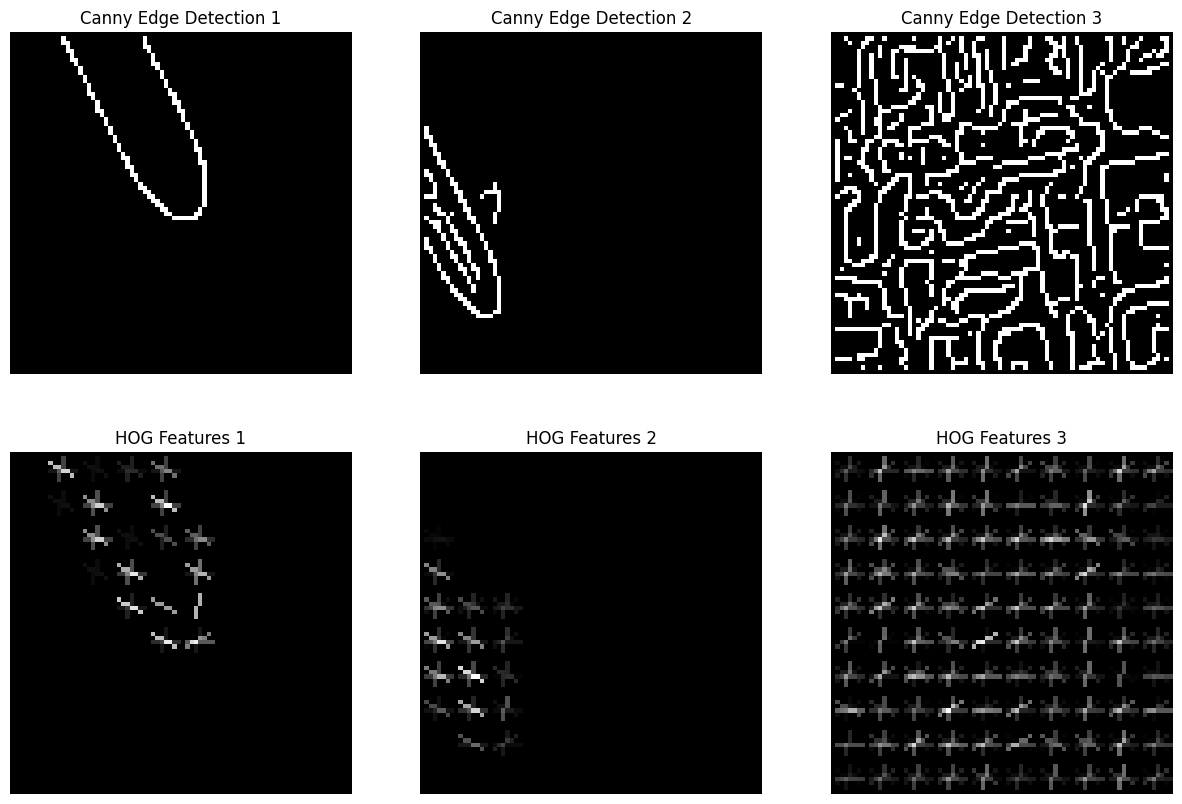

In [73]:
from skimage.feature import canny, hog
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

# Function to extract HOG features with Canny edge detection
def extract_hog_features(images, sigma=1):
    hog_features = []
    for img in images:
        # Convert to grayscale
        gray_img = rgb2gray(np.array(img))
        # Apply Canny edge detection
        edges = canny(gray_img, sigma=sigma)
        # Extract HOG features
        features = hog(edges, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Function to display Canny edge-detected images and HOG features
def display_canny_and_hog_images(images, sigma=1, num_images=3):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        gray_img = rgb2gray(np.array(images[i]))
        edges = canny(gray_img, sigma=sigma)
        features, hog_image = hog(edges, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Canny Edge Detection {i+1}')
        plt.axis('off')
        
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(hog_image, cmap='gray')
        plt.title(f'HOG Features {i+1}')
        plt.axis('off')
    plt.show()

train_labels = [0] * len(train_0) + [1] * len(train_1)
test_labels = [0] * len(test_0) + [1] * len(test_1)
val_labels = [0] * len(val_0) + [1] * len(val_1)

# Extract HOG features with Canny edge detection
train_features = extract_hog_features(train_images, sigma=1)
test_features = extract_hog_features(test_images, sigma=1)
val_features = extract_hog_features(val_images, sigma=1)

# Example usage: Display Canny edge-detected images and HOG features for the first three training images
display_canny_and_hog_images(train_images, sigma=1, num_images=3)

In [41]:
# Determine the correct shape for HOG features
hog_feature_length = train_features.shape[1]
side_length = int(np.sqrt(hog_feature_length))

# Reshape features for CNN input
train_features = train_features.reshape(-1, side_length, side_length, 1)
test_features = test_features.reshape(-1, side_length, side_length, 1)
val_features = val_features.reshape(-1, side_length, side_length, 1)


In [42]:
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        gray_img = rgb2gray(np.array(img))
        features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Prepare the dataset
class_0_images, class_1_images = load_and_categorize_images('shipsnet')
train_0, test_0, val_0 = split_dataset(class_0_images)
train_1, test_1, val_1 = split_dataset(class_1_images)

train_images = train_0 + train_1
test_images = test_0 + test_1
val_images = val_0 + val_1

train_labels = [0] * len(train_0) + [1] * len(train_1)
test_labels = [0] * len(test_0) + [1] * len(test_1)
val_labels = [0] * len(val_0) + [1] * len(val_1)

train_features = extract_hog_features(train_images)
test_features = extract_hog_features(test_images)
val_features = extract_hog_features(val_images)

# Determine the correct shape for HOG features
hog_feature_length = train_features.shape[1]
side_length = int(np.sqrt(hog_feature_length))

# Reshape features for CNN input
train_features = train_features.reshape(-1, side_length, side_length, 1)
test_features = test_features.reshape(-1, side_length, side_length, 1)
val_features = val_features.reshape(-1, side_length, side_length, 1)

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3), activation='relu', input_shape=(side_length, side_length, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Adding a second Conv2D layer
    model.add(Conv2D(filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Adding a third Conv2D layer
    model.add(Conv2D(filters=hp.Int('filters_3', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))  # Fixed number of units
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use Keras Tuner to find the best model
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=10, executions_per_trial=3, directory='bssss_bsss', project_name='cnn_hog')

tuner.search(train_features, np.array(train_labels), epochs=10, validation_data=(val_features, np.array(val_labels)))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(train_features, np.array(train_labels), epochs=10, validation_data=(val_features, np.array(val_labels)))

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(test_features, np.array(test_labels))
print(f'Test accuracy: {test_accuracy}')

Reloading Tuner from bssss_bsss\cnn_hog\tuner0.json
Epoch 1/10
31/31 [==============================] - 2s 30ms/step - loss: 0.0950 - accuracy: 0.9683 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 2/10
31/31 [==============================] - 1s 22ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3/10
31/31 [==============================] - 1s 22ms/step - loss: 0.0466 - accuracy: 0.9888 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 2s 77ms/step - loss: 0.0322 - accuracy: 0.9928 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 3s 99ms/step - loss: 0.0250 - accuracy: 0.9959 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 3s 92ms/step - loss: 0.0154 - accuracy: 0.9990 - val_loss: 0.0180 - val_accuracy: 0.9859
Epoch 7/10
31/31 [==============================] - 3s 112ms/step - loss: 0.0129 - accuracy: 0.9990 - 

In [43]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 52, 52, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 96)        83040     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 96)         0

In [44]:
best_model.save('best_ship_classifier_latest.h5')

In [45]:
import numpy as np
import random
from sklearn.metrics import classification_report

In [46]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the entire test set
predictions = best_model.predict(test_features)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Print classification report
report = classification_report(np.array(test_labels), predicted_labels, target_names=['Class 0', 'Class 1'])
print(report)

9/9 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99       140
     Class 1       0.98      0.99      0.99       140

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



1/1 [==============================] - 0s 28ms/step


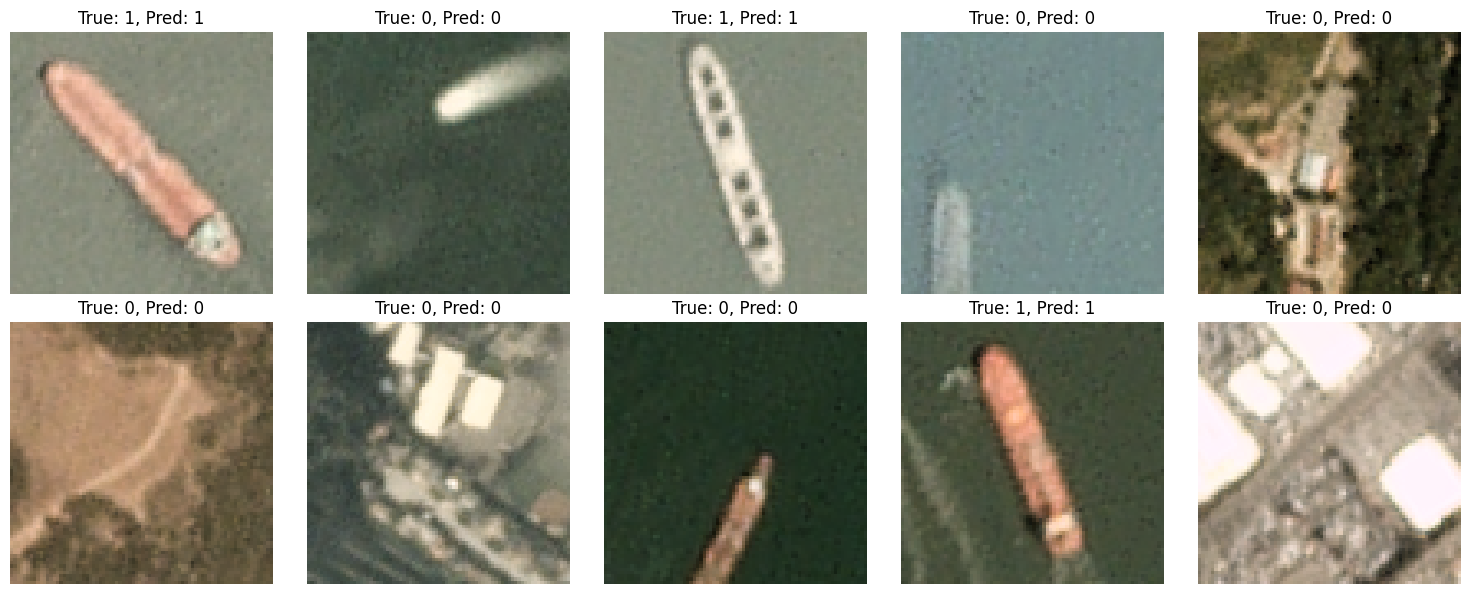

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Select 10 random images from the test set
random_indices = random.sample(range(len(test_features)), 10)
random_test_features = test_features[random_indices]
random_test_labels = np.array(test_labels)[random_indices]

# Make predictions
predictions = best_model.predict(random_test_features)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Plot the images with true and predicted labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = test_images[idx]
    true_label = random_test_labels[i]
    pred_label = predicted_labels[i]
    
    axes[i].imshow(img)
    axes[i].set_title(f'True: {true_label}, Pred: {pred_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [48]:
# Assuming train_features, val_features, and test_features are already defined

print(f'Number of training images: {train_features.shape[0]}')
print(f'Number of validation images: {val_features.shape[0]}')
print(f'Number of test images: {test_features.shape[0]}')

Number of training images: 978
Number of validation images: 142
Number of test images: 280


9/9 [==============================] - 0s 9ms/step


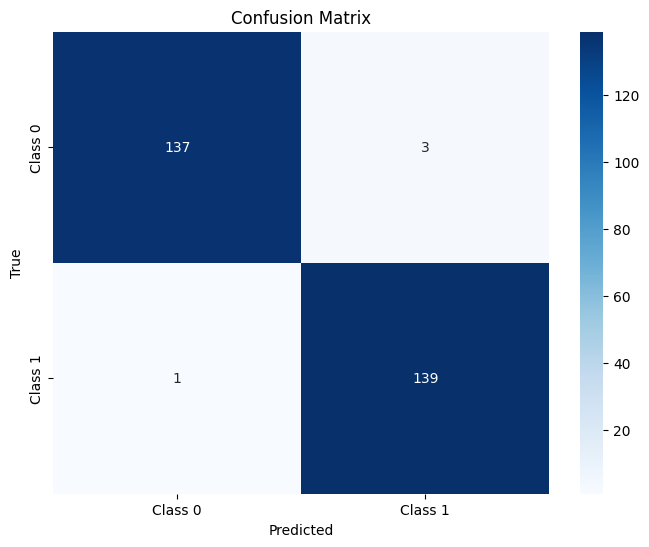

In [49]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the entire test set
predictions = best_model.predict(test_features)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Compute the confusion matrix
cm = confusion_matrix(np.array(test_labels), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()